In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from IPython.display import Audio
import librosa
import librosa.display

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [18]:
data_dir = 'C:\\Users\\kalya\\OneDrive\\Desktop\\new_gui\\SPEECH-EMOTION-RECOGNITION-WITH-MACHINE-LEARNING-main\\TESS Toronto emotional speech set data'

In [19]:
# Initialize empty lists for features and labels
features = []
labels = []
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        emotion_label = folder.split('_')[-1]  # Extract the emotion label from the folder name
        
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_path.endswith('.wav'):
                # Load the audio file and extract features
                audio, sr = librosa.load(file_path, duration=3)  # Adjust the duration as needed
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc, axis=1)
                features.append(mfcc_mean)
                labels.append(emotion_label)

In [20]:
features = np.array(features)
labels = np.array(labels)

In [21]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [22]:
# Define the emotions and the number of samples to select from each emotion
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
num_samples_per_emotion = 3
# Initialize empty lists for storing the selected samples
selected_samples = []

In [23]:
# Iterate through the emotions and select samples
for emotion in emotions:
    emotion_dir = os.path.join(data_dir, f'OAF_{emotion}')
    audio_files = os.listdir(emotion_dir)
    selected_files = np.random.choice(audio_files, size=num_samples_per_emotion, replace=False)
    
    for file_name in selected_files:
        file_path = os.path.join(emotion_dir, file_name)
        audio, sr = librosa.load(file_path, duration=3)
        selected_samples.append((audio, sr, emotion))


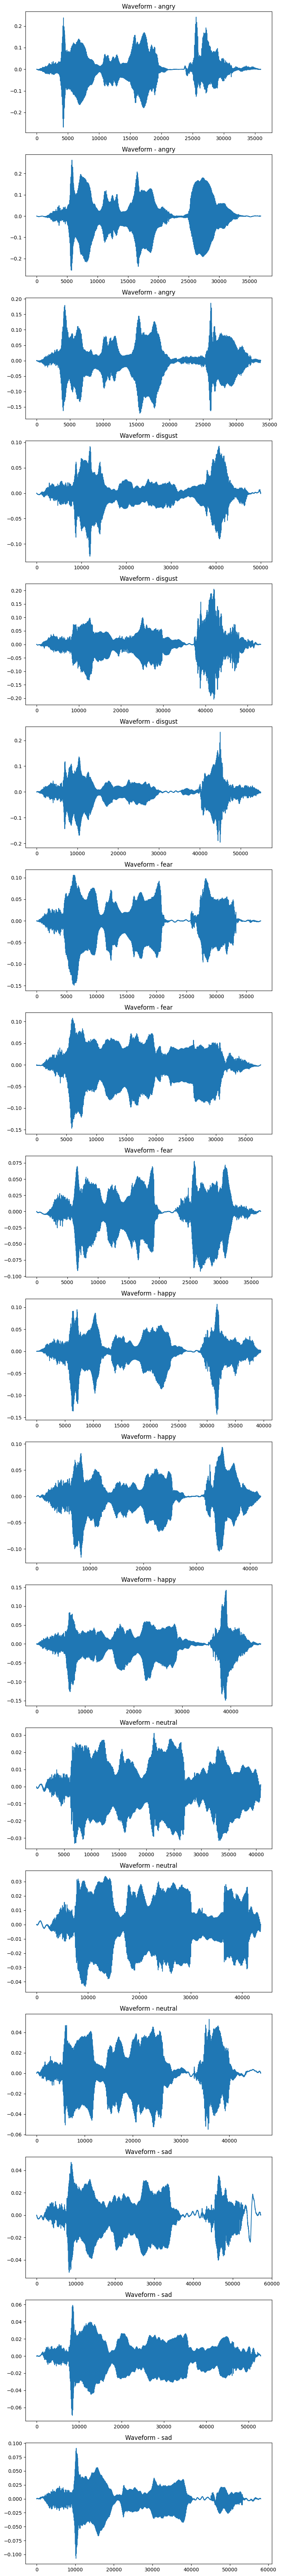

In [24]:
# Plot the selected samples
num_samples = len(selected_samples)
plt.figure(figsize=(8, 4 * num_samples))

for i, (audio, sr, emotion) in enumerate(selected_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(audio)
    plt.title(f'Waveform - {emotion}')

plt.tight_layout()
plt.show()


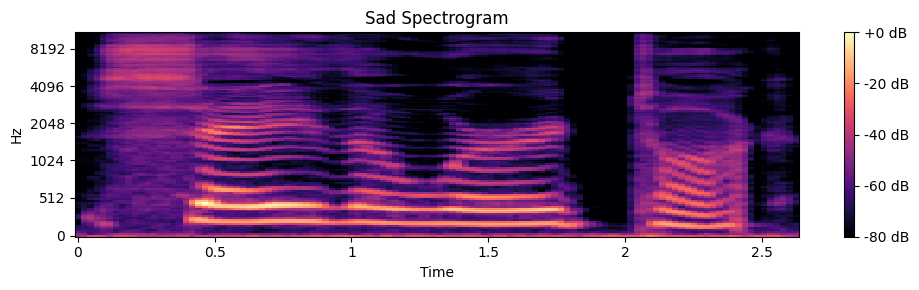

In [25]:
# Calculate the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

# Convert power spectrogram to dB scale
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Sad Spectrogram')
plt.tight_layout()
plt.show()
Audio(file_path)

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.utils import to_categorical

# Assuming augmented_features and augmented_labels are already defined

# Define the model architecture with increased complexity
model = Sequential([
    Bidirectional(LSTM(units=512, input_shape=(max_len, 1), return_sequences=True)),
    Dropout(0.5),
    LSTM(units=256, return_sequences=True),
    Dropout(0.5),
    LSTM(units=128),
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1600 - loss: 1.8035 - val_accuracy: 0.1400 - val_loss: 1.8054
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step - accuracy: 0.3600 - loss: 1.7883 - val_accuracy: 0.1400 - val_loss: 1.8101
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3600 - loss: 1.7727 - val_accuracy: 0.1400 - val_loss: 1.8182
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step - accuracy: 0.3400 - loss: 1.7492 - val_accuracy: 0.1600 - val_loss: 1.8326
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3200 - loss: 1.7209 - val_accuracy: 0.1800 - val_loss: 1.8587
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3400 - loss: 1.6780 - val_accuracy: 0.1800 - val_loss: 1.8990
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3800 - loss: 1.6380 - val_accuracy: 0.1600 - val_loss: 1.9179
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step - accuracy: 0.4000 - loss: 1.5988 - val_accuracy: 0.1600 - val_loss: 1.89

In [88]:
# Define a list to store the preprocessed data
preprocessed_data = []
file_list = os.listdir(data_dir)
# Iterate over the files
for filename in file_list:
    file_path = os.path.join(data_dir, filename)
    
    # Skip non-audio files
    if not filename.endswith('.wav'):
        continue

    # Load the audio file and obtain the waveform and sample rate
    waveform, sr = librosa.load(file_path, sr=None, dtype=np.float32)

    # Resample the audio if needed
    if sr != 22050:
        waveform = librosa.resample(waveform, sr, 22050)
        sr = 22050


In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Example features and labels (replace with your actual data)
features = np.random.randn(100, 40)  # Example features, replace with your actual data
labels = ['angry', 'happy', 'disgust', 'sad', 'neutral'] * 20  # Example labels, replace with your actual data

# Encode the emotion labels
label_mapping = {'angry': 0, 'happy': 1, 'disgust': 2, 'sad': 3, 'neutral': 4}
encoded_labels = np.array([label_mapping.get(label, -1) for label in labels])

# Filter out samples with unknown emotion labels
valid_indices = np.where(encoded_labels != -1)[0]
features = features[valid_indices]
encoded_labels = encoded_labels[valid_indices]

# Print out unique encoded labels to debug
print("Unique labels:", np.unique(encoded_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Reshape the input features (assuming your features are MFCCs with shape (num_samples, num_frames))
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

# Convert the emotion labels to categorical format
num_classes = len(np.unique(encoded_labels))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the model architecture (example architecture)
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=64),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Unique labels: [0 1 2 3 4]
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.1953 - loss: 1.6106 - val_accuracy: 0.3000 - val_loss: 1.6116
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2555 - loss: 1.6016 - val_accuracy: 0.2000 - val_loss: 1.6200
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2609 - loss: 1.5886 - val_accuracy: 0.1500 - val_loss: 1.6253
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3180 - loss: 1.5789 - val_accuracy: 0.1000 - val_loss: 1.6337
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3422 - loss: 1.5742 - val_accuracy: 0.2000 - val_loss: 1.6484
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3047 - loss: 1.5648 - val_accuracy: 0.2000 - val_loss: 1.6843
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2969 - loss: 1.5240 - val_accuracy: 0.2500 - val_loss: 1.7516
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3141 - loss: 1.4955 - val_accuracy

In [109]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 40, 1)
y_train shape: (80, 5)
X_test shape: (20, 40, 1)
y_test shape: (20, 5)


In [110]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(13, 1, 1), padding='same'))

# Add a second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with softmax activation for 6 classes
model.add(Dense(6, activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 13, 1, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 13, 1, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 0, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 0, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 0, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,222 (442.27 KB)

 Trainable params: 113,222 (442.27 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Bidirectional(LSTM(units=256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)),
    Dropout(0.4),  # Adjusted dropout rate
    LSTM(units=128, return_sequences=False),  # Return_sequences set to False for last LSTM layer
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1500 - loss: 1.6208 - val_accuracy: 0.2500 - val_loss: 1.6174
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.1625 - loss: 1.6183 - val_accuracy: 0.1500 - val_loss: 1.6177
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.2250 - loss: 1.6182 - val_accuracy: 0.1500 - val_loss: 1.6181
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2125 - loss: 1.6179 - val_accuracy: 0.1500 - val_loss: 1.6185
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.2250 - loss: 1.6159 - val_accuracy: 0.1500 - val_loss: 1.6189
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.3000 - loss: 1.6150 - val_accuracy: 0.1500 - val_loss: 1.6193
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2500 - loss: 1.6144 - val_accuracy: 0.1500 - val_loss: 1.6197
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2750 - loss: 1.6131 - val_accuracy: 0.1000 - val_

In [112]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3000 - loss: 1.6619
Accuracy of our model on test data :  30.000001192092896 %


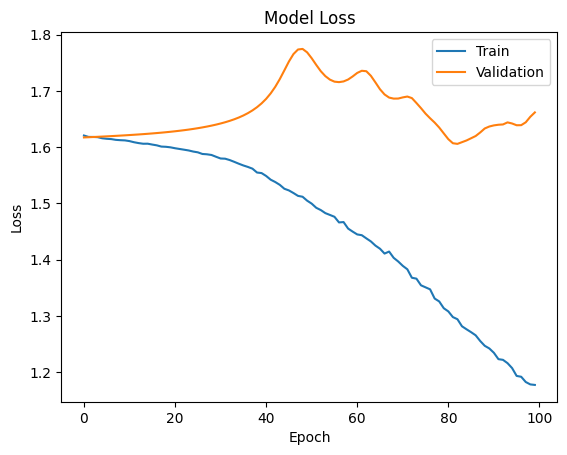

In [113]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

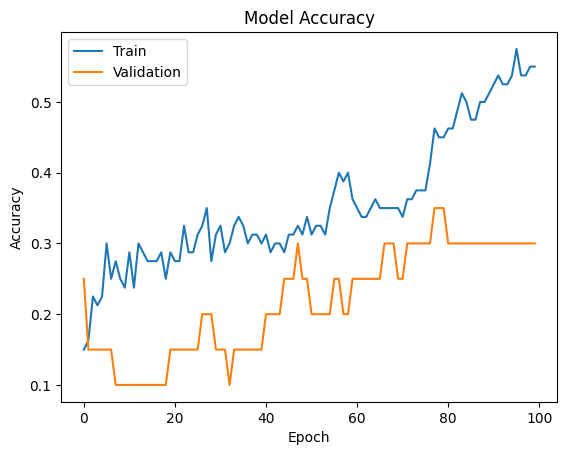

In [114]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


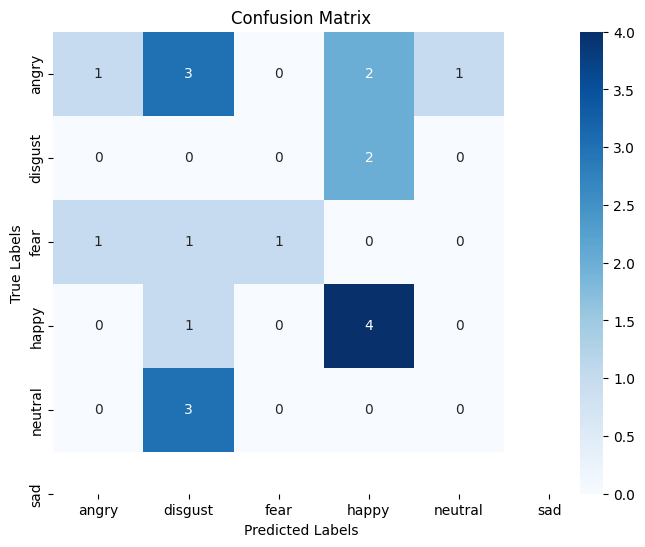

In [115]:
# Get the predicted labels for the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to labels

# Convert the true labels from one-hot encoding to labels
y_true_labels = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']  # Replace with your actual class names
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names, labels=range(len(class_names)))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [116]:
print(report)

              precision    recall  f1-score   support

       angry       0.50      0.14      0.22         7
     disgust       0.00      0.00      0.00         2
        fear       1.00      0.33      0.50         3
       happy       0.50      0.80      0.62         5
     neutral       0.00      0.00      0.00         3
         sad       0.00      0.00      0.00         0

    accuracy                           0.30        20
   macro avg       0.33      0.21      0.22        20
weighted avg       0.45      0.30      0.31        20



In [117]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=64)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5000 - loss: 1.2487 - val_accuracy: 0.7083 - val_loss: 0.9640
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.5000 - loss: 1.2359 - val_accuracy: 0.7083 - val_loss: 0.9839
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5000 - loss: 1.2305 - val_accuracy: 0.6667 - val_loss: 0.9963
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.5000 - loss: 1.2159 - val_accuracy: 0.6250 - val_loss: 1.0053
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.5357 - loss: 1.2016 - val_accuracy: 0.6250 - val_loss: 1.0205
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.5000 - loss: 1.1962 - val_accuracy: 0.5833 - val_loss: 1.0343
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.5000 - loss: 1.1882 - val_accuracy: 0.5833 - val_loss: 1.0509
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.5179 - loss: 1.1624 - val_accuracy: 0.5833 - v

In [119]:
print("Accuracy of our model on train data : " , model.evaluate(X_train,y_train)[1]*100 , "%")

Accuracy of our model on train data :  92.50000238418579 %
